In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.pipeline import make_pipeline

In [10]:
# Preprocess the data
file_path = r'c:\Users\charlie\Desktop\ML Final\dataset.csv'
dataframe = pd.read_csv(file_path)
# Check for null values
# print(dataframe.isnull().sum()*100/dataframe.shape[0])

# Convert 'Date' column to datetime and extract month and year
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe['Month'] = dataframe['Date'].dt.month
dataframe['Year'] = dataframe['Date'].dt.year
dataframe = dataframe.drop(columns=['Date'])

# Map 'Year' to a number representing the order
dataframe['Year'] = dataframe['Year'] - dataframe['Year'].min()

# Split training and test data
X = dataframe.drop(columns=['SPX'])
y = dataframe['SPX']

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    train_size=0.7,
    test_size=0.3,
    random_state=100
)

# Apply scaler() to all the columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Accuracy

In [11]:
# Define models
svc = SVC()
pca = PCA()
pipeline = make_pipeline(pca, svc)

# Define parameters
param_grid = {
    'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8],
    'svc__C': [0.1, 1, 10, 100, 1000],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['linear', 'rbf', 'sigmoid'],
    # 'svc__degree': [2, 3, 4]
}

# Perform grid search. n_jobs = number of cpu cores, scoring can be accuracy, precision, recall, f1
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', verbose=2, n_jobs=10)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("Best parameters found: ", best_params)
print("Best model accuracy: ", accuracy)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best parameters found:  {'pca__n_components': 5, 'svc__C': 1000, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best model accuracy:  0.6097560975609756


In [12]:
# Define models
svc = SVC()
pca = PCA()
pipeline = make_pipeline(pca, svc)

# Define parameters
param_grid = {
    'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['poly'],
    'svc__degree': [2, 3, 4]
}

# Perform grid search. n_jobs = number of cpu cores, scoring can be accuracy, precision, recall, f1
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', verbose=2, n_jobs=10)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("Best parameters found: ", best_params)
print("Best model accuracy: ", accuracy)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters found:  {'pca__n_components': 6, 'svc__C': 1, 'svc__degree': 4, 'svc__gamma': 1, 'svc__kernel': 'poly'}
Best model accuracy:  0.5487804878048781


# Precision

In [13]:
# Define models
svc = SVC()
pca = PCA()
pipeline = make_pipeline(pca, svc)

# Define parameters
param_grid = {
    'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8],
    'svc__C': [0.1, 1, 10, 100, 1000],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['linear', 'rbf', 'sigmoid'],
    # 'svc__degree': [2, 3, 4]
}

# Perform grid search. n_jobs = number of cpu cores, scoring can be accuracy, precision, recall, f1
grid_search = GridSearchCV(pipeline, param_grid, scoring='precision', verbose=2, n_jobs=10)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_val)
precision = precision_score(y_val, y_pred)

print("Best parameters found: ", best_params)
print("Best model precision: ", precision)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best parameters found:  {'pca__n_components': 6, 'svc__C': 1000, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best model precision:  0.6792452830188679


In [14]:
# Define models
svc = SVC()
pca = PCA()
pipeline = make_pipeline(pca, svc)

# Define parameters
param_grid = {
    'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['poly'],
    'svc__degree': [2, 3, 4]
}

# Perform grid search. n_jobs = number of cpu cores, scoring can be accuracy, precision, recall, f1
grid_search = GridSearchCV(pipeline, param_grid, scoring='precision', verbose=2, n_jobs=10)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_val)
precision = precision_score(y_val, y_pred)

print("Best parameters found: ", best_params)
print("Best model precision: ", precision)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters found:  {'pca__n_components': 6, 'svc__C': 1, 'svc__degree': 4, 'svc__gamma': 1, 'svc__kernel': 'poly'}
Best model precision:  0.6481481481481481



K = 1
Confusion matrix:
 [[ 0 29]
 [ 1 52]]
Accuracy: 0.6341463414634146
Precision: 0.6419753086419753
Recall: 0.9811320754716981
F1 Score: 0.7761194029850746

K = 2
Confusion matrix:
 [[ 0 29]
 [ 1 52]]
Accuracy: 0.6341463414634146
Precision: 0.6419753086419753
Recall: 0.9811320754716981
F1 Score: 0.7761194029850746

K = 3
Confusion matrix:
 [[ 3 26]
 [ 6 47]]
Accuracy: 0.6097560975609756
Precision: 0.6438356164383562
Recall: 0.8867924528301887
F1 Score: 0.746031746031746

K = 4
Confusion matrix:
 [[ 6 23]
 [ 7 46]]
Accuracy: 0.6341463414634146
Precision: 0.6666666666666666
Recall: 0.8679245283018868
F1 Score: 0.7540983606557377

K = 5
Confusion matrix:
 [[ 9 20]
 [12 41]]
Accuracy: 0.6097560975609756
Precision: 0.6721311475409836
Recall: 0.7735849056603774
F1 Score: 0.719298245614035

K = 6
Confusion matrix:
 [[12 17]
 [17 36]]
Accuracy: 0.5853658536585366
Precision: 0.6792452830188679
Recall: 0.6792452830188679
F1 Score: 0.6792452830188679

K = 7
Confusion matrix:
 [[13 16]
 [17 36

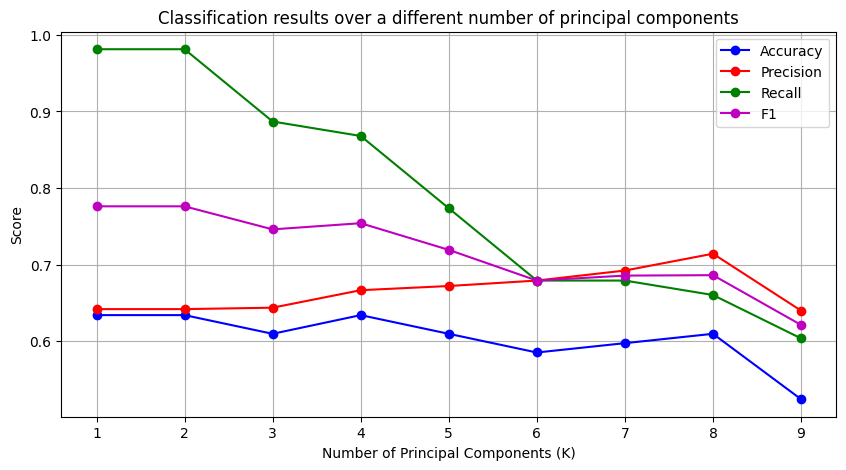

In [17]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for k in range(1, 10):
    # Run PCA for k components
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)

    # Run Support Vector Classifier
    clf = SVC(kernel='rbf', C=1000, gamma=.01)
    clf.fit(X_train_pca, y_train)

    # Make predictions
    y_pred = clf.predict(X_val_pca)

    # Get confusion matrix
    cnf_matrix = confusion_matrix(y_val, y_pred)

    # Get accuracy, precision, recall and F1 score
    accuracy = metrics.accuracy_score(y_val, y_pred)
    precision = metrics.precision_score(y_val, y_pred, pos_label=1)
    recall = metrics.recall_score(y_val, y_pred, pos_label=1)
    f1 = (2*precision*recall)/(precision+recall) if (precision+recall) != 0 else 0

    # Store and display the metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    print("\nK =", k)
    print("Confusion matrix:\n", cnf_matrix)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

# Graph the metrics
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), accuracy_list, marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(range(1, 10), precision_list, marker='o', linestyle='-', color='r', label='Precision')
plt.plot(range(1, 10), recall_list, marker='o', linestyle='-', color='g', label='Recall')
plt.plot(range(1, 10), f1_list, marker='o', linestyle='-', color='m', label='F1')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Classification results over a different number of principal components')
plt.legend()
plt.grid(True)
plt.show()


K = 8
Confusion matrix:
 [[15 14]
 [18 35]]
Accuracy: 0.6097560975609756
Precision: 0.7142857142857143
Recall: 0.660377358490566
F1 Score: 0.6862745098039216


[Text(0, 0.5, 'Down'), Text(0, 1.5, 'Up')]

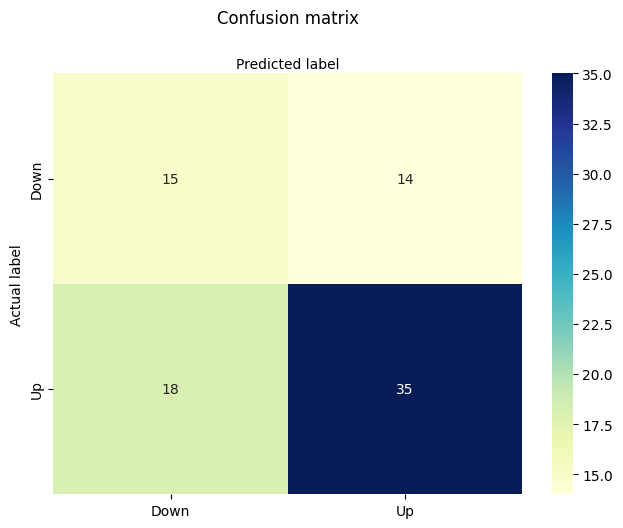

In [18]:
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

clf = SVC(kernel='rbf', C=1000, gamma=.01)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_val_pca)

# Get confusion matrix
cnf_matrix = confusion_matrix(y_val, y_pred)

# Get accuracy, precision, recall and F1 score
accuracy = metrics.accuracy_score(y_val, y_pred)
precision = metrics.precision_score(y_val, y_pred, pos_label=1)
recall = metrics.recall_score(y_val, y_pred, pos_label=1)
f1 = (2*precision*recall)/(precision+recall) if (precision+recall) != 0 else 0

# Display the metrics
print("\nK = 8")
print("Confusion matrix:\n", cnf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion matrix using heatmap
class_names = ['Down', 'Up']
fig, ax = plt.subplots()
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)